#### Goal of this model
- Create the model to predict that customer will leave the company or not

In [3]:
# understand the data
# figure out the right model
# Train and test the model
# Do some prediction
# Summary for this project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
cust_churn = pd.read_csv("./datasets/ChurnData.csv")
cust_churn.head()
# print(cust_churn.head(0))

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
# Understanding the data
cust_churn.describe()
# cust_churn.shape
# cust_churn[1 : 0]
cust_churn['churn']


0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    0.0
198    1.0
199    0.0
Name: churn, Length: 200, dtype: float64

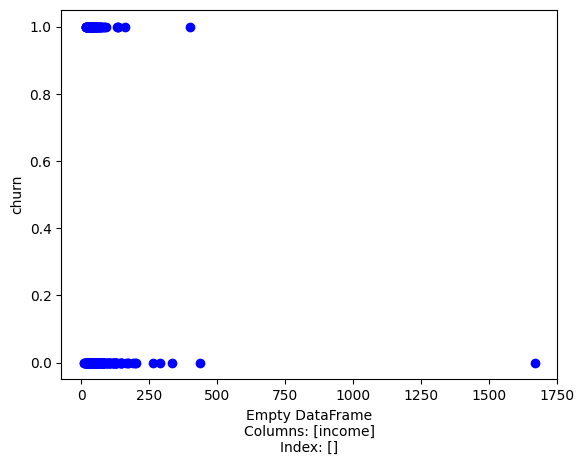

In [7]:
# check relevant features
# feature Engineering

cust_churn_df = cust_churn[["tenure", "age", "income", "churn"]]
x = cust_churn[["income"]]
plt.scatter(x, cust_churn_df.churn, color='b')
plt.xlabel(x[1 : 0])
plt.ylabel("churn")
xy = cust_churn[["income", "churn"]]
xy
plt.show()

In [25]:
# Choosing training and testing data
# x, y
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = cust_churn[["tenure", "age", "address", "income", "ed", "employ", "equip", "callcard"]]
# scaling the data to avoid early convergence issue
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y = cust_churn[["churn"]]
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=8)
print(f"training data shape {x_train.shape}, {y_train.shape}")
print(f"Testing data shape {x_test.shape}, {y_test.shape}")
x_train

training data shape (160, 8), (160, 1)
Testing data shape (40, 8), (40, 1)


array([[-0.67193838, -0.93260766, -0.4588971 , ..., -0.92053635,
         1.16316   ,  0.64686916],
       [-1.32048283, -0.47262854,  0.23191574, ...,  0.53441472,
        -0.85972695,  0.64686916],
       [-0.06971853, -1.39258677, -0.85364729, ..., -0.36093978,
        -0.85972695,  0.64686916],
       ...,
       [ 0.16190449, -0.54929173, -0.75495974, ..., -0.80861704,
         1.16316   ,  0.64686916],
       [-0.44031536, -0.85594447, -0.261522  , ..., -1.03245566,
        -0.85972695,  0.64686916],
       [ 0.90309815,  0.21734013,  1.21879121, ...,  1.42976922,
        -0.85972695,  0.64686916]])

In [26]:
# Train and test the data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train.values.ravel())
y_pred = log_reg.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0.])

In [ ]:
# Testing accuracy of the model using accuracy score
# accuracy = Number of correct predictions / Total number of predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.775

confustion matrix value: 
[[25  4]
 [ 5  6]]


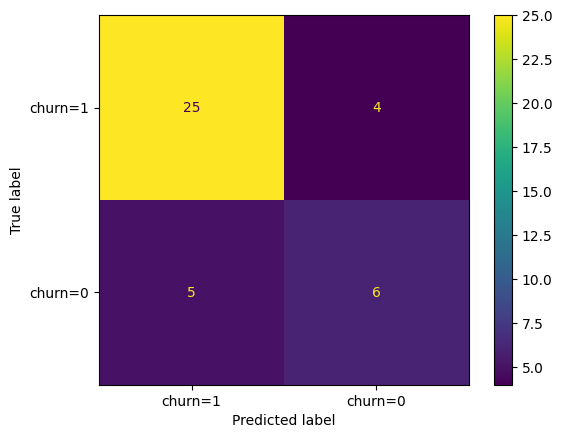

In [35]:
# Testing the accuracy of the model using confusion matrix
# confusion matrix =  (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)
print(f"confustion matrix value: \n{con_mat}")

np.set_printoptions(precision=2)

# plot non-normalized confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=["churn=1", "churn=0"])
disp.plot()
plt.show()

In [ ]:
# Classifcation report
# It gives overview of accuracy, precision, recall, f1-score for all classes

# support = number of actual occurrences of the class in the specified dataset
# True positive (TP) = Predicted positive and actual positive
# True negative (TN) = Predicted negative and actual negative
# False positive (FP) = Predicted positive and actual negative
# False negative (FN) = Predicted negative and actual positive

# accuracy = (TP + TN) / (TP + TN + FP + FN)
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1-score = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(f"Classification report: \n{class_report}")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.60      0.55      0.57        11

    accuracy                           0.78        40
   macro avg       0.72      0.70      0.71        40
weighted avg       0.77      0.78      0.77        40



In [40]:
# Log loss

# It is used to evaluate the performance of a classification model
# It is used when the model outputs probablity of the prediction

from sklearn.metrics import log_loss
y_prob = log_reg.predict_proba(x_test)
logLoss = log_loss(y_test, y_prob)
print(f"Log loss: {logLoss}")

Log loss: 0.44380234072349295


In [ ]:
# cross validation score
# split the data into k subsets and train the model k times and test the model on the remaining data
# It avoids overfitting and underfitting

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(log_reg, x_scaled, y.values.ravel(), cv=10, scoring="accuracy")
print(f"Cross-validation score: {cross_val}")

Cross-validation score: [0.7  0.7  0.75 0.75 0.7  0.8  0.8  0.7  0.8  0.75]


In [44]:
# precision, recall, f1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

Precision: 0.6, Recall: 0.5454545454545454, F1-score: 0.5714285714285714


In [45]:
# Lesson Learned:

# Understand the dataset
# choose the right model
# Train and test the model
# Make some prediction
# Evaluate the model with different metrics

# Summary:
# choosing the right feature and model is important
#